In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt

from sqlalchemy import create_engine
%matplotlib inline

## 데이터베이스 접속
- 비밀번호 입력 필요

In [3]:
# 차트 기본 설정
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.color': 'r',
          'lines.linewidth': 4,
          'axes.grid': True}
plt.rcParams.update(params)

## 월별 상품등록 비교 (2019년)
- 전문상점 VS 일반상점

In [4]:
# 일반상점 상품등록
start_date = '2019-01-01 00:00:00'
end_date = '2019-11-30 23:59:59'
query = f"""
SELECT TO_CHAR(p.create_date, 'YYYY-mm') AS date, count(*) AS normal 
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
	AND u.bizlicense = 0
GROUP BY TO_CHAR(p.create_date, 'YYYY-mm');
"""
df_normal_reg = pd.read_sql(query, con=redshift)


# 전문상점 상품등록
query = f"""
SELECT TO_CHAR(p.create_date, 'YYYY-mm') AS date, count(*) AS biz 
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
	AND u.bizlicense = 1
GROUP BY TO_CHAR(p.create_date, 'YYYY-mm');
"""
df_biz_reg = pd.read_sql(query, con=redshift)

# 셀러(전체) 상품등록
query = f"""
SELECT TO_CHAR(p.create_date, 'YYYY-mm') AS date, count(*) AS all 
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
GROUP BY TO_CHAR(p.create_date, 'YYYY-mm');
"""
df_all_reg = pd.read_sql(query, con=redshift)

# 데이터 병합
df_reg = pd.merge(df_normal_reg, df_biz_reg, on='date')
df_reg = pd.merge(df_reg, df_all_reg, on='date')
df_reg.sort_values(by=['date'], inplace=True)

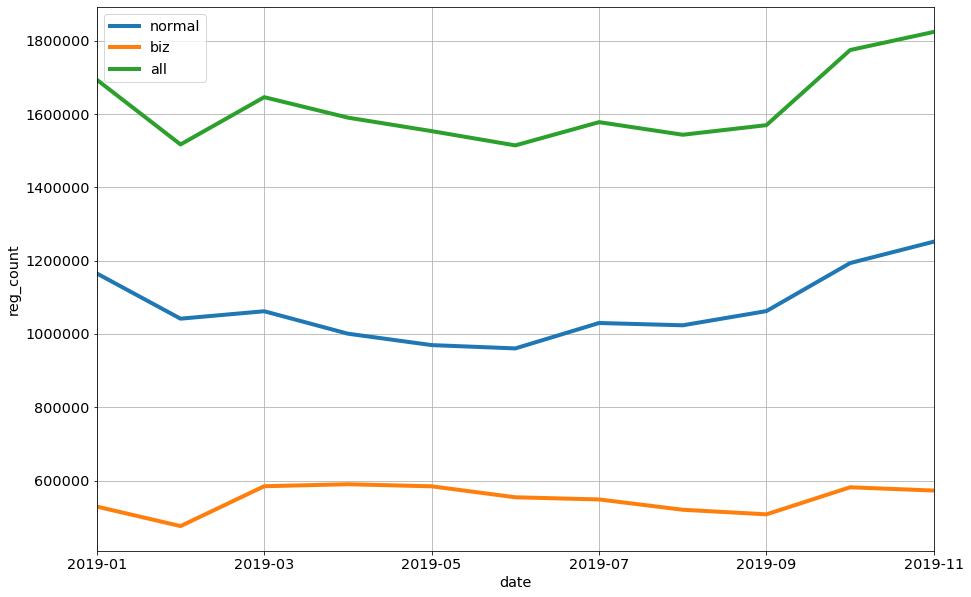

In [5]:
df_reg.plot(x='date')
plt.xlabel("date")
plt.ylabel("reg_count")
plt.show()

### 특이사항
- 전체적인 상품등록 추세는 연말에서 연초(2월)까지 하락세
- 전문상점의 상품등록 추세는 7월부터 10월까지 뚜렷한 하락세

## 일별 상품등록 비교 (2019.11월 기준)
- 전문상점 VS 일반상점

In [122]:
# 일반상점 상품등록
start_date = '2019-11-01 00:00:00'
end_date = '2019-11-30 23:59:59'
query = f"""
SELECT TO_CHAR(p.create_date, 'YYYY-mm-dd') AS date, count(*) AS normal FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
	AND u.bizlicense = 0
GROUP BY TO_CHAR(p.create_date, 'YYYY-mm-dd');
"""
df_normal_reg = pd.read_sql(query, con=redshift)


# 전문상점 상품등록
query = f"""
SELECT TO_CHAR(p.create_date, 'YYYY-mm-dd') AS date, count(*) AS biz FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
	AND u.bizlicense = 1
GROUP BY TO_CHAR(p.create_date, 'YYYY-mm-dd');
"""
df_biz_reg = pd.read_sql(query, con=redshift)

# 셀러(전체) 상품등록
query = f"""
SELECT TO_CHAR(p.create_date, 'YYYY-mm-dd') AS date, count(*) AS all FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
GROUP BY TO_CHAR(p.create_date, 'YYYY-mm-dd');
"""
df_all_reg = pd.read_sql(query, con=redshift)

# 데이터 병합
df_reg = pd.merge(df_normal_reg, df_biz_reg, on='date')
df_reg = pd.merge(df_reg, df_all_reg, on='date')
df_reg.sort_values(by=['date'], inplace=True)

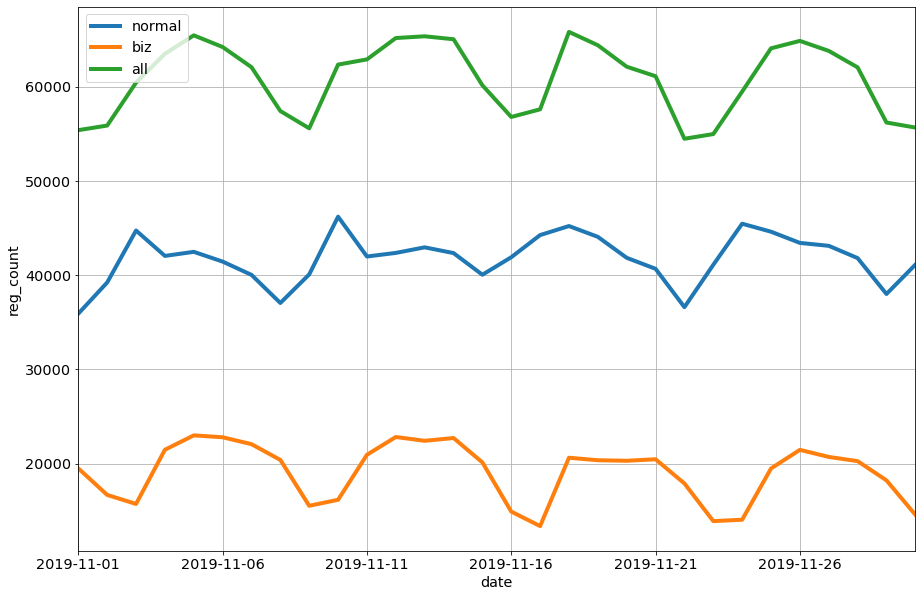

In [123]:
df_reg.plot(x='date')
plt.xlabel("date")
plt.ylabel("reg_count")
plt.show()

### 특이사항
- 전문상점의 상품등록은 토요일과 일요일에 하락세
- 전문상점과는 반대로 일반상점은 토요일과 일요일에 상승세 

## 시간별 상품등록 비교 (2019.11.1 기준)
- 전문상점 VS 일반상점

In [153]:
# 일반상점 상품등록
start_date = '2019-11-01 00:00:00'
end_date = '2019-11-01 23:59:59'
query = f"""
SELECT DATE_FORMAT(p.create_date, '%%H') AS date, count(*) AS normal 
FROM product_info p
INNER JOIN user u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
	AND u.bizlicense = 0
GROUP BY DATE_FORMAT(p.create_date, '%%H');
"""
df_normal_reg = pd.read_sql(query, con=db_slave)


# 전문상점 상품등록
query = f"""
SELECT DATE_FORMAT(p.create_date, '%%H') AS date, count(*) AS biz 
FROM product_info p
INNER JOIN user u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
	AND u.bizlicense = 1
GROUP BY DATE_FORMAT(p.create_date, '%%H');
"""
df_biz_reg = pd.read_sql(query, con=db_slave)

# 셀러(전체) 상품등록
query = f"""
SELECT DATE_FORMAT(p.create_date, '%%H') AS date, count(*) AS all_ 
FROM product_info p
INNER JOIN user u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
GROUP BY DATE_FORMAT(p.create_date, '%%H');
"""
df_all_reg = pd.read_sql(query, con=db_slave)

# 데이터 병합
df_reg = pd.merge(df_normal_reg, df_biz_reg, on='date')
df_reg = pd.merge(df_reg, df_all_reg, on='date')
df_reg.sort_values(by=['date'], inplace=True)

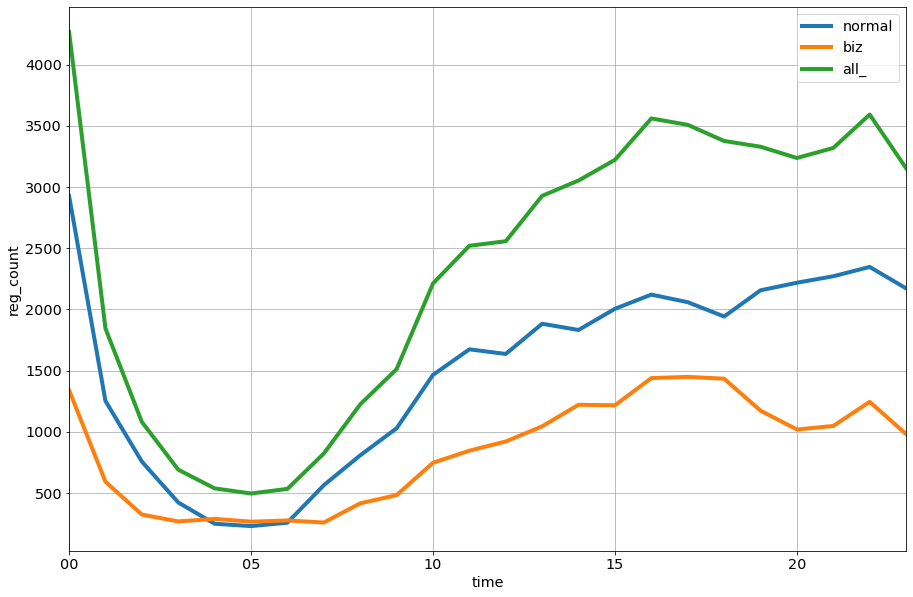

In [155]:
df_reg.plot(x='date')
plt.xlabel("time")
plt.ylabel("reg_count")
plt.show()

## 셀러별 상품 등록 주기 (2019년 1월~11월)
- 셀러별 새로운 상품을 등록하는 시간 차이
- 등록 주기 평균

In [61]:
# 전체
query = f"""
with temp as
    (
    select p.uid, p.create_date , ROW_NUMBER() over (order by p.uid, p.create_date) as row_num
    from service1_quicket.product_info p
    where p.create_date BETWEEN '{start_date}' AND '{end_date}'
    group by p.uid, p.create_date
    order by p.uid, p.create_date
    )
select base.uid, base.create_date, datediff(hour,base.create_date::timestamp, future.create_date::timestamp) as diff
from temp as base
left join temp as future on base.row_num+1 = future.row_num
where base.create_date BETWEEN '{start_date}' AND '{end_date}'
order by base.uid, base.create_date
"""
df_product_term = pd.read_sql(query, con=redshift)

In [62]:
df_product_term

,uid,create_date,diff
0,21,2019-02-26 13:54:03.837000+00:00,1267.0
1,21,2019-04-20 08:24:29.624000+00:00,306.0
2,21,2019-05-03 02:02:27.319000+00:00,1812.0
3,21,2019-07-17 14:56:58.199000+00:00,192.0
4,21,2019-07-25 14:27:28.646000+00:00,1887.0
5,21,2019-10-12 05:13:29.348000+00:00,-6624.0
6,50,2019-01-09 05:44:04.644000+00:00,0.0
7,50,2019-01-09 05:46:11.058000+00:00,0.0
8,50,2019-01-09 05:47:29.080000+00:00,5.0
9,50,2019-01-09 10:08:54.538000+00:00,239.0


In [63]:
# change the last value of each uid's diff list
# since each uid's last diff value is the difference 
# between its last create_date and the next uid's first create_date
length = len(df_product_term)
for i in range(length-1):
    if i % 1000 == 0:
        print(str(i/length*100) + '%')
    if df_product_term.loc[i,'uid'] != df_product_term.loc[i+1,'uid']:
        df_product_term.loc[i,'diff'] = None

0.0%
0.005114791260253878%
0.010229582520507756%
0.015344373780761634%
0.020459165041015512%
0.025573956301269386%
0.030688747561523268%
0.03580353882177714%
0.040918330082031024%
0.046033121342284905%
0.05114791260253877%
0.05626270386279266%
0.061377495123046535%
0.06649228638330042%
0.07160707764355428%
0.07672186890380817%
0.08183666016406205%
0.08695145142431591%
0.09206624268456981%
0.09718103394482368%
0.10229582520507755%
0.10741061646533144%
0.11252540772558532%
0.11764019898583919%
0.12275499024609307%
0.12786978150634695%
0.13298457276660083%
0.1380993640268547%
0.14321415528710857%
0.14832894654736245%
0.15344373780761633%
0.1585585290678702%
0.1636733203281241%
0.16878811158837795%
0.17390290284863183%
0.17901769410888574%
0.18413248536913962%
0.18924727662939347%
0.19436206788964736%
0.1994768591499012%
0.2045916504101551%
0.20970644167040897%
0.21482123293066288%
0.21993602419091676%
0.22505081545117064%
0.23016560671142453%
0.23528039797167838%
0.24039518923193226%
0.24

KeyboardInterrupt: 

In [4]:
start_date = '2019-01-01 00:00:00'
end_date = '2019-12-31 23:59:59'

In [ ]:
# 전문
query = f"""
with temp as
    (
    select p.uid, p.create_date , ROW_NUMBER() over (order by p.uid, p.create_date) as row_num
    from service1_quicket.product_info p
    where p.create_date BETWEEN '{start_date}' AND '{end_date}'
    group by p.uid, p.create_date
    order by p.uid, p.create_date
    )
select base.uid, base.create_date, datediff(hour,base.create_date::timestamp, future.create_date::timestamp) as diff
from temp as base
left join temp as future on base.row_num+1 = future.row_num
join service1_quicket.user_ u on u.id = base.uid
where base.create_date BETWEEN '{start_date}' AND '{end_date}' and u.bizlicense = 1
order by base.uid, base.create_date
"""

df_biz_product_term = pd.read_sql(query, con=redshift)
print('=====biz shops\' data is prepared=====')

length = len(df_biz_product_term)
for i in range(length-1):
    if i % 1000 == 0:
        print(str(i/length*100) + '%')
    if df_biz_product_term.loc[i,'uid'] != df_biz_product_term.loc[i+1,'uid']:
        df_biz_product_term.loc[i,'diff'] = None

# 일반
query = f"""
with temp as
    (
    select p.uid, p.create_date , ROW_NUMBER() over (order by p.uid, p.create_date) as row_num
    from service1_quicket.product_info p
    where p.create_date BETWEEN '{start_date}' AND '{end_date}'
    group by p.uid, p.create_date
    order by p.uid, p.create_date
    )
select base.uid, base.create_date, datediff(hour,base.create_date::timestamp, future.create_date::timestamp) as diff
from temp as base
left join temp as future on base.row_num+1 = future.row_num
join service1_quicket.user_ u on u.id = base.uid
where base.create_date BETWEEN '{start_date}' AND '{end_date}' and u.bizlicense = 0
order by base.uid, base.create_date
"""

df_normal_product_term = pd.read_sql(query, con=redshift)
print('=====normal shops\' data is prepared=====')

length = len(df_normal_product_term)
for i in range(length-1):
    if i % 1000 == 0:
        print(str(i/length*100) + '%')
    if df_normal_product_term.loc[i,'uid'] != df_normal_product_term.loc[i+1,'uid']:
        df_normal_product_term.loc[i,'diff'] = None


## 카테고리 순위

In [5]:
# 모든 상점
query = f"""
SELECT p.category_id as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
GROUP BY p.category_id
ORDER BY count(*) desc
"""
df_all_category = pd.read_sql(query, con=redshift)

# 전문 상점
query = f"""
SELECT p.category_id as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' AND u.bizlicense = 1
GROUP BY p.category_id
ORDER BY count(*) desc
"""
df_biz_category = pd.read_sql(query, con=redshift)

# 일반 상점
query = f"""
SELECT p.category_id as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' AND u.bizlicense = 0
GROUP BY p.category_id
ORDER BY count(*) desc
"""
df_normal_category = pd.read_sql(query, con=redshift)

In [6]:
# 데이터 병합
df_category = pd.merge(df_normal_category, df_biz_category, how = 'outer', on='categoryid', suffixes=('_normal', '_biz'))
df_category = pd.merge(df_category, df_all_category, how = 'outer', on='categoryid')
df_category.sort_values(by=['categoryid'], inplace=True)
df_category

,categoryid,count_normal,count_biz,count
986,100,2.0,NaN,2
601,100200,1419.0,1661.0,3080
738,100400,323.0,49.0,372
625,100600,1118.0,315.0,1433
440,100800,3904.0,6060.0,9964
921,200,10.0,7.0,17
194,200100,16339.0,4050.0,20389
620,200200,1203.0,336.0,1539
550,200300,2351.0,1024.0,3375
681,200400,659.0,535.0,1194


In [ ]:
df_category.to_excel('categoryId_rank.xlsx')

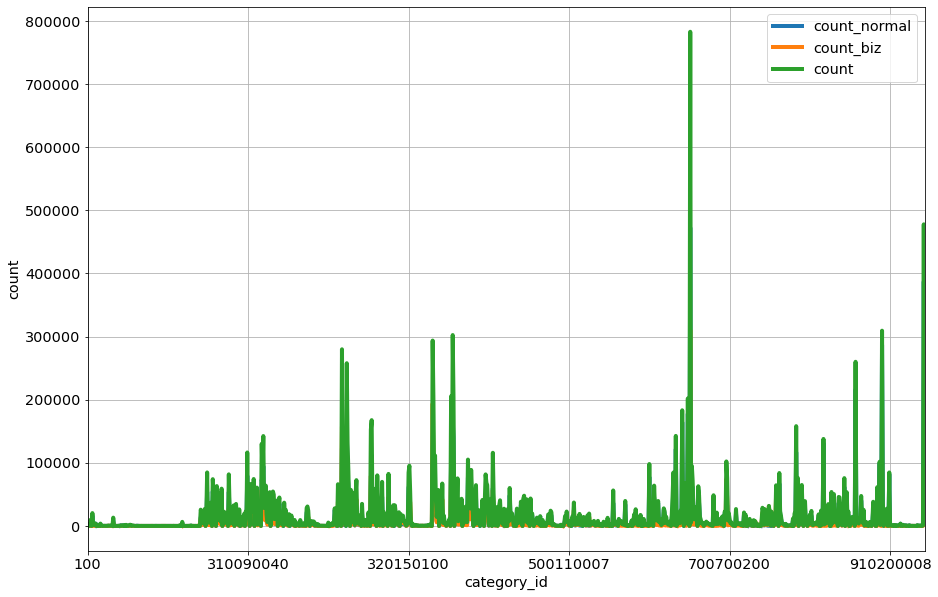

In [47]:
df_category.plot(x='categoryid')
plt.xlabel("category_id")
plt.ylabel("count")
plt.show()

## 셀러별 상품의 카테고리 범위
- 전체 카테고리 (full category id)
- 대카테고리 (first three category id)

In [7]:
# 전체
query = f"""
SELECT p.uid as seller, p.category_id as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
GROUP BY p.uid, p.category_id
ORDER BY P.uid, count(*) desc, p.category_id
"""
df_all_seller_category = pd.read_sql(query, con=redshift)

# 전문
query = f"""
SELECT p.uid as seller, p.category_id as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' and u.bizlicense = 1
GROUP BY p.uid, p.category_id
ORDER BY P.uid, count(*) desc, p.category_id
"""
df_biz_seller_category = pd.read_sql(query, con=redshift)

# 일반
query = f"""
SELECT p.uid as seller, p.category_id as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' and u.bizlicense = 0
GROUP BY p.uid, p.category_id
ORDER BY P.uid, count(*) desc, p.category_id
"""
df_normal_seller_category = pd.read_sql(query, con=redshift)


In [16]:
# 데이터 병합
df_seller_category = pd.merge(df_normal_seller_category, df_biz_seller_category, how = 'outer', on=['seller', 'categoryid'])
df_seller_category = pd.merge(df_seller_category, df_all_seller_category, how = 'outer', on=['seller', 'categoryid'])
df_seller_category.sort_values(by=['seller','count_x'], inplace=True)
df_seller_category = df_seller_category[['seller','categoryid','count']]

In [ ]:
df_seller_category[df_seller_category['count'].isin(df_seller_category.groupby('seller').max()['count'].values)]

In [14]:
# consider big category

# 전체
query = f"""
SELECT p.uid as seller, LEFT(p.category_id,3) as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
GROUP BY p.uid, LEFT(p.category_id,3)
ORDER BY p.uid, count(*) desc
"""
df_all_seller_bigcate = pd.read_sql(query, con=redshift)

# 전문
query = f"""
SELECT p.uid as seller, LEFT(p.category_id,3) as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' and u.bizlicense = 1
GROUP BY p.uid, LEFT(p.category_id,3)
ORDER BY p.uid, count(*) desc
"""
df_biz_seller_bigcate = pd.read_sql(query, con=redshift)

# 일반
query = f"""
SELECT p.uid as seller, LEFT(p.category_id,3) as categoryID, count(*) AS count
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' and u.bizlicense = 0
GROUP BY p.uid, LEFT(p.category_id,3)
ORDER BY p.uid, count(*) desc
"""
df_normal_seller_bigcate = pd.read_sql(query, con=redshift)


In [15]:
# 데이터 병합

# 모든 상점의 큰 카테고리별 상품 갯수를 알고싶을 때 사용
# 모든 상점이지만 전문 상점일 경우엔 normal_count가 Nan이고, 일반 상점일 경우엔 biz_count가 Nan이다.
df_seller_bigcate = pd.merge(df_biz_seller_bigcate, df_normal_seller_bigcate, how = 'outer', on = ['seller', 'categoryid'], suffixes=('_biz', '_normal'))
df_seller_bigcate = pd.merge(df_seller_bigcate, df_all_seller_bigcate, how = 'outer', on = ['seller', 'categoryid'])

Text(0, 0.5, 'Number of seller')

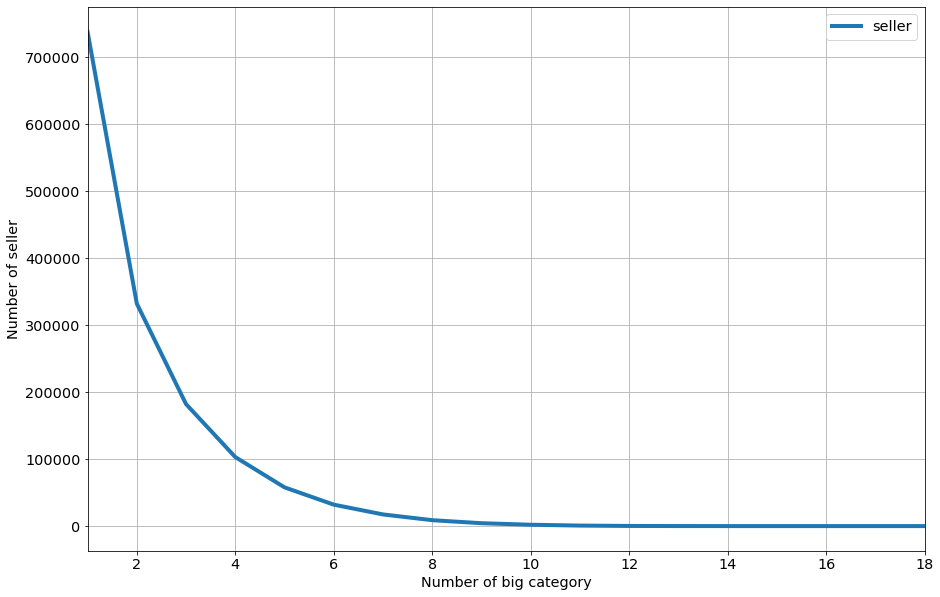

In [28]:
# 
bigcategory_freq = df_all_seller_bigcate.groupby('seller', as_index=False)['categoryid'].count().groupby('categoryid', as_index=False)['seller'].count()
bigcategory_freq.plot(x='categoryid')
plt.xlabel('Number of big category')
plt.ylabel('Number of seller')

Text(0, 0.5, 'Number of seller')

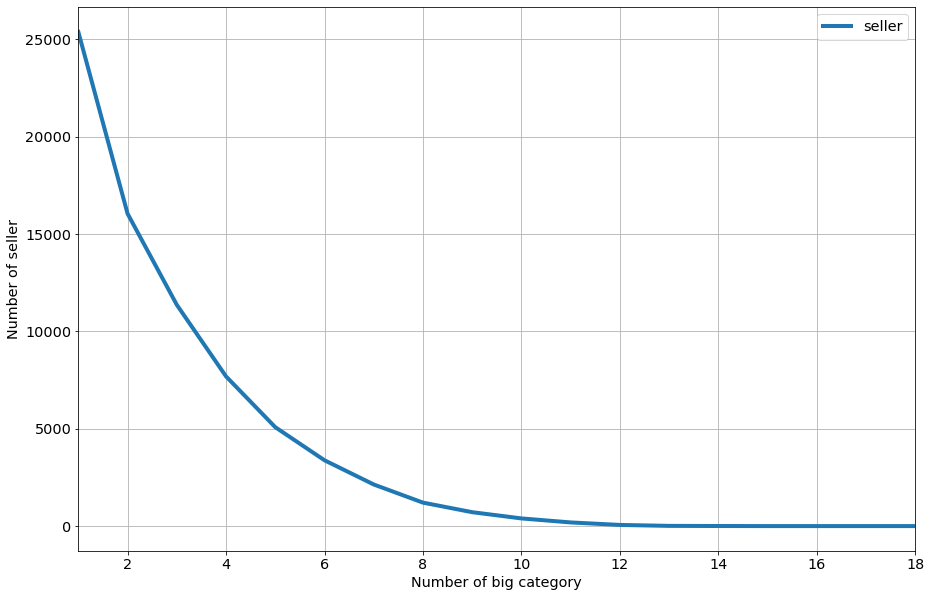

In [29]:
# 
bigcategory_biz_freq = df_biz_seller_bigcate.groupby('seller', as_index=False)['categoryid'].count().groupby('categoryid', as_index=False)['seller'].count()
bigcategory_biz_freq.plot(x='categoryid')
plt.xlabel('Number of big category')
plt.ylabel('Number of seller')

Text(0, 0.5, 'Number of seller')

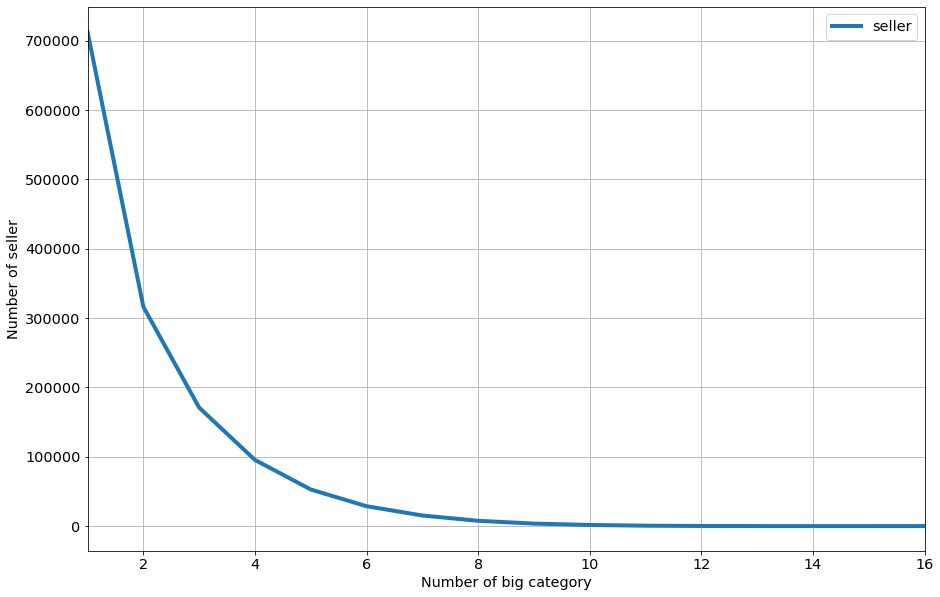

In [30]:
# 
bigcategory_normal_freq = df_normal_seller_bigcate.groupby('seller', as_index=False)['categoryid'].count().groupby('categoryid', as_index=False)['seller'].count()
bigcategory_normal_freq.plot(x='categoryid')
plt.xlabel('Number of big category')
plt.ylabel('Number of seller')

## 셀러별 상품 가격
- 셀러별 최소 상품 값, 최대 상품 값, 평균 상품 값

In [33]:
# 전체
query = f"""
SELECT p.uid as seller, max(p.price) as max_price, min(p.price) as min_price, avg(p.price) as avg_price
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}'
GROUP BY p.uid
"""
df_all_price = pd.read_sql(query, con=redshift)

# 일반
query = f"""
SELECT p.uid as seller, max(p.price) as max_price, min(p.price) as min_price, avg(p.price) as avg_price
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' AND u.bizlicense = 0
GROUP BY p.uid
"""
df_normal_price = pd.read_sql(query, con=redshift)

# 전문
query = f"""
SELECT p.uid as seller, max(p.price) as max_price, min(p.price) as min_price, avg(p.price) as avg_price
FROM service1_quicket.product_info p
INNER JOIN service1_quicket.user_ u ON u.id = p.uid
WHERE p.create_date BETWEEN '{start_date}' AND '{end_date}' AND u.bizlicense = 1
GROUP BY p.uid
"""
df_biz_price = pd.read_sql(query, con=redshift)

In [39]:
print('mean price fr. all shop: ' + str(df_all_price['avg_price'].mean()))
print('mean price fr. biz shop: ' + str(df_biz_price['avg_price'].mean()))
print('mean price fr. normal shop: ' + str(df_normal_price['avg_price'].mean()))

mean price fr. all shop: 916153.4968690152
mean price fr. biz shop: 1435388.1160704591
mean price fr. normal shop: 888932.042188197


In [40]:
print('mean of min price fr. all shop: ' + str(df_all_price['min_price'].mean()))
print('mean of min price fr. biz shop: ' + str(df_biz_price['min_price'].mean()))
print('mean of min price fr. normal shop: ' + str(df_normal_price['min_price'].mean()))

mean of min price fr. all shop: 344355.95934215176
mean of min price fr. biz shop: 389346.13126967754
mean of min price fr. normal shop: 341997.2993435352


In [41]:
print('mean of max price fr. all shop: ' + str(df_all_price['max_price'].mean()))
print('mean of max price fr. biz shop: ' + str(df_biz_price['max_price'].mean()))
print('mean of max price fr. normal shop: ' + str(df_normal_price['max_price'].mean()))

mean of max price fr. all shop: 3882082.6387121286
mean of max price fr. biz shop: 10132387.292028552
mean of max price fr. normal shop: 3554403.4382704673


## 셀러별 팔로워 수
- 셀러별 상점 팔로우 수

In [58]:
# all
query = f"""
select u.id as seller, u.favorite_count as follower_cnt
from service1_quicket.user_ u
where u.join_date BETWEEN '{start_date}' AND '{end_date}'
"""
df_all_follow = pd.read_sql(query, con=redshift)

# bizlicense 
query = f"""
select u.id as seller, u.favorite_count as follower_cnt
from service1_quicket.user_ u
where u.join_date BETWEEN '{start_date}' AND '{end_date}'and u.bizlicense = 1
"""
df_biz_follow = pd.read_sql(query, con=redshift)

# normal
query = f"""
select u.id as seller, u.favorite_count as follower_cnt
from service1_quicket.user_ u
where u.join_date BETWEEN '{start_date}' AND '{end_date}' and u.bizlicense = 0
"""
df_normal_follow = pd.read_sql(query, con=redshift)

In [59]:
print('mean of the number of follower - all: ' + str(df_all_follow['follower_cnt'].mean()))
print('mean of the number of follower - biz shop: ' + str(df_biz_follow['follower_cnt'].mean()))
print('mean of the number of follower - normal shop: ' + str(df_normal_follow['follower_cnt'].mean()))

mean of the number of follower - all: 0.13921074947735473
mean of the number of follower - biz shop: 14.87248865845755
mean of the number of follower - normal shop: 0.061730840753601926


## 셀러별 클릭수 (2019년 11월)
- 셀러별 상점 클릭수  
⚠︎ bun_log_ca.ca_event_type_shop_click 이 2019년 10월 23일 부터 쌓임

In [ ]:
# all
query = f"""
SELECT click.target_id as seller, count(*) as click_cnt
FROM bun_log_ca.ca_event_type_shop_click as click
WHERE click.year = '2019' and click.month = '11'
GROUP BY click.target_id
ORDER BY click.target_id
"""
df_all_click = pd.read_sql(query, con=redshift)

# 전문
query = f"""
SELECT click.target_id as seller, count(*) as click_cnt
FROM bun_log_ca.ca_event_type_shop_click as click
JOIN service1_quicket.user_ as u ON click.target_id = u.id
WHERE click.year = '2019' and click.month = '11' and u.bizlicense = 1
GROUP BY click.target_id
ORDER BY click.target_id
"""
df_biz_click = pd.read_sql(query, con=redshift)

# 일반
query = f"""
SELECT click.target_id as seller, count(*) as click_cnt
FROM bun_log_ca.ca_event_type_shop_click as click
JOIN service1_quicket.user_ as u ON click.target_id = u.id
WHERE click.year = '2019' and click.month = '11' and u.bizlicense = 0
GROUP BY click.target_id
ORDER BY click.target_id
"""
df_normal_click = pd.read_sql(query, con=redshift)

## 셀러별 찜수
- 셀러별 상품 찜수

In [51]:
# all 
query = f"""
select u.id as seller, u.favorite_count as zzim_cnt
from service1_quicket.user_ u
where u.modified_at BETWEEN '{start_date}' AND '{end_date}'
"""
df_all_zzim = pd.read_sql(query, con=redshift)

# bizlicense 
query = f"""
select u.id as seller, u.favorite_count as zzim_cnt
from service1_quicket.user_ u
where u.bizlicense = 1 and u.modified_at BETWEEN '{start_date}' AND '{end_date}'
"""
df_biz_zzim = pd.read_sql(query, con=redshift)

# normal
query = f"""
select u.id as seller, u.favorite_count as zzim_cnt
from service1_quicket.user_ u
where u.bizlicense = 0 and u.modified_at BETWEEN '{start_date}' AND '{end_date}'
"""
df_normal_zzim = pd.read_sql(query, con=redshift)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-51-1dc29122cbd6>, line 2)

In [5]:
# all 
query = f"""
select u.id as seller, sum(pe.pfavcnt) as zzim_all
from service1_quicket.product_ext pe
join service1_quicket.product_info p on pe.pid = p.id
join service1_quicket.user_ u on p.uid = u.id
where p.create_date between '{start_date}' and '{end_date}'
group by u.id
order by u.id
"""
df_all_zzim = pd.read_sql(query, con=redshift)

# bizlicense 
query = f"""
select u.id as seller, sum(pe.pfavcnt) as zzim_biz
from service1_quicket.product_ext pe
join service1_quicket.product_info p on pe.pid = p.id
join service1_quicket.user_ u on p.uid = u.id
where p.create_date between '{start_date}' and '{end_date}' and u.bizlicense = 1
group by u.id
order by u.id
"""
df_biz_zzim = pd.read_sql(query, con=redshift)

# normal
query = f"""
select u.id as seller, sum(pe.pfavcnt) as zzim_normal
from service1_quicket.product_ext pe
join service1_quicket.product_info p on pe.pid = p.id
join service1_quicket.user_ u on p.uid = u.id
where p.create_date between '{start_date}' and '{end_date}' and u.bizlicense = 0
group by u.id
order by u.id
"""
df_normal_zzim = pd.read_sql(query, con=redshift)

In [14]:
# all 
query = f"""
select u.id as seller, avg(pe.pfavcnt) as zzim_all
from service1_quicket.product_ext pe
join service1_quicket.product_info p on pe.pid = p.id
join service1_quicket.user_ u on p.uid = u.id
where p.create_date between '{start_date}' and '{end_date}'
group by u.id
order by u.id
"""
df_all_zzim = pd.read_sql(query, con=redshift)

# bizlicense 
query = f"""
select u.id as seller, avg(pe.pfavcnt) as zzim_biz
from service1_quicket.product_ext pe
join service1_quicket.product_info p on pe.pid = p.id
join service1_quicket.user_ u on p.uid = u.id
where p.create_date between '{start_date}' and '{end_date}' and u.bizlicense = 1
group by u.id
order by u.id
"""
df_biz_zzim = pd.read_sql(query, con=redshift)

# normal
query = f"""
select u.id as seller, avg(pe.pfavcnt) as zzim_normal
from service1_quicket.product_ext pe
join service1_quicket.product_info p on pe.pid = p.id
join service1_quicket.user_ u on p.uid = u.id
where p.create_date between '{start_date}' and '{end_date}' and u.bizlicense = 0
group by u.id
order by u.id
"""
df_normal_zzim = pd.read_sql(query, con=redshift)

In [22]:
df_normal_zzim['zzim_normal'].median()

1.0

## 